<img src='letscodebr_cover.jpeg' align='left' width=100%/>

# Ada Tech [DS-PY-004] Técnicas de Programação I (PY) Aula 8: Limpeza de Dados.

## Introdução

A limpeza é uma etapa necessária em qualquer projeto de dados. 

Podemos resumir o processo de limpeza de dados nas cinco tarefas a seguir:

**1. Resolva problemas de formatação e atribuição dos tipos de dados corretos.**

Por exemplo, ao passar um arquivo CSV para o Pandas, uma data pode não ser importada corretamente, como pode ser o caso de um campo de data onde 20090609231247 é importado em vez de 2009-06-09 23:12:47.

O formato em que os dados são encontrados determina quais operações podem ser executadas nele.

**2. Padronize as categorias.**

Quando os dados foram coletados com um sistema que não possui valores padronizados, os valores que representam a mesma categoria podem ser expressos de forma diferente. Por exemplo: Arg, AR, Argentina.

**3. Corrija os valores errados.**

Por exemplo: um valor inválido ou numérico para descrever o gênero; ou uma idade representada por um número negativo ou muito maior que 100.

**4. Preencha os dados ausentes.**

Conjuntos de dados do mundo real geralmente vêm com dados ausentes que correspondem a informações que foram perdidas ou nunca coletadas. Existem várias técnicas para preencher os dados ausentes. O processo de preenchimento de dados ausentes é chamado de "imputação".

**5. Organize o conjunto de dados.**

É importante estruturar as linhas e colunas da maneira mais conveniente. Para fazer isso, as regras de *tidy data* (dados organizados) podem ser aplicadas.

## Dataset

Apresentamos um conjunto de dados [imobiliários](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) da cidade de Melbourne, na Austrália. O conjunto de dados que usaremos nesta parte, a partir de 2017, é construído com os dados que foram [publicados a cada semana](https://www.domain.com.au/).

Os dados incluem endereço, tipo de imóvel, bairro, forma de venda, quartos, preço, agente imobiliário, data da venda e distância até o CBD (Central Business District).

Os campos que inclui são:

**Rooms**: número de quartos

**Price**: preço em dólares

**Method**: S - imóvel vendido; SP - imóvel vendido anteriormente; PI - propriedade transmitida; PN - vendido antes não divulgado; SN - vendido não divulgado; NB - sem licitação; VB - oferta do fornecedor; W - retirado antes do leilão; SA - vendido após leilão; SS - vendido após o preço do leilão não divulgado. N / A - preço ou lance mais alto não disponível.

**Type**: br - quarto (s); h - casa, casa de campo, villa, semi, terraço; u - unidade, duplex; t - casa geminada; site dev - site de desenvolvimento; ou res - outro residencial.

**SellerG**: agente imobiliario

**Date**: data de venda

**Distance**: distância até o CBD

**Regionname**: região (oeste, noroeste, norte, nordeste ... etc)

**Propertycount**: quantidade de propriedades existentes naquele subúrbio.

**Bedroom2** : # Salas destruídas (de fontes diferentes)

**Bathroom**: número de banheiros

**Car**: número de vagas

**Landsize**: superfície

**BuildingArea**: tamanho da construção

**CouncilArea**: município


Leemos los datos desde el archivo csv

In [1]:
import pandas as pd

# local
data_location = "../Data/melb_data.csv"

data = pd.read_csv(data_location)

data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Detecção de valores ausentes

Começaremos detectando quais registros têm valores nulos e, em seguida, contaremos quantos nulos existem em cada coluna.

Para isso usaremos o método [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) que nos retorna outro `DataFrame` onde cada elemento é `True` ou` False` dependendo se aquele elemento no objeto DataFrame original é nulo ou não.

In [2]:
is_null_result = data.isnull()
print(is_null_result.head(3))

   Suburb  Address  Rooms   Type  Price  Method  SellerG   Date  Distance  \
0   False    False  False  False  False   False    False  False     False   
1   False    False  False  False  False   False    False  False     False   
2   False    False  False  False  False   False    False  False     False   

   Postcode  ...  Bathroom    Car  Landsize  BuildingArea  YearBuilt  \
0     False  ...     False  False     False          True       True   
1     False  ...     False  False     False         False      False   
2     False  ...     False  False     False         False      False   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0        False      False       False       False          False  
1        False      False       False       False          False  
2        False      False       False       False          False  

[3 rows x 21 columns]


Outra maneira é usar o método: [`notnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

In [3]:
is_notnull_resulto = data.notnull()
print(is_notnull_resulto.head(3))

   Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0    True     True   True  True   True    True     True  True      True   
1    True     True   True  True   True    True     True  True      True   
2    True     True   True  True   True    True     True  True      True   

   Postcode  ...  Bathroom   Car  Landsize  BuildingArea  YearBuilt  \
0      True  ...      True  True      True         False      False   
1      True  ...      True  True      True          True       True   
2      True  ...      True  True      True          True       True   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0         True       True        True        True           True  
1         True       True        True        True           True  
2         True       True        True        True           True  

[3 rows x 21 columns]


Observe, para cada elemento, a relação entre os valores em cada objeto de resultado DataFrame (`is_null_result` e `is_notnull_result`).

Para ver quantos nulos existem em cada coluna, usaremos a função `sum` no `DataFrame` em que a função `isnull` estiver aplicada:

In [4]:
quantidade_nulls = is_null_result.sum()
print(quantidade_nulls)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Vemos que apenas quatro campos têm valores ausentes: Car, BuildingArea, YearBuilt, CouncilArea

Como vemos quantos <b> elementos não nulos temos em cada coluna </b> do nosso DataFrame?

## Drop

Assim que detectarmos os dados ausentes em nosso DataFrame, devemos decidir o que fazer com eles.

Uma maneira de proceder é excluir os registros ou campos que contêm alguns dados ausentes:

* Vantagem: fácil implementação
* Desvantagem: perda significativa de informação, possíveis vieses nos estimadores dos parâmetros.

Este método **assume que a não resposta foi gerada aleatoriamente** e isso geralmente não acontece.

Se os dados ausentes forem poucos e distantes entre si, esse método é ideal.


Algumas das opções são:

* Exclua todas as colunas que têm algum valor ausente

* Exclua todas as linhas que têm um valor ausente

* Exclua todas as colunas que possuem todos os registros com valor ausente

* Exclua todas as linhas que contêm todos os campos com valor ausente

* Elimine todas as colunas que possuem um número de registros com valor (não nulo) menor que um limite (limite)

* Elimine todas as linhas que possuem um número de campos com valor (não nulo) menor que um limite (limite)

(Outras estratégias que veremos um pouco mais tarde são a imputação de valores ausentes.)

O método que vamos usar para todas as opções listadas aqui é [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Para mais informações veja a documentação:

### Remova todas as colunas que têm algum valor ausente

In [5]:
data_columns = data.dropna(axis = 1)
# quantidade de colunas antes de aplicar a função: 21
print(data.shape)
# quantidade de colunas após aplicar a funçaõ: 17
print(data_columns.shape)

(13580, 21)
(13580, 17)


### Exclua todas as linhas que têm algum valor ausente

In [6]:
data_rows = data.dropna()
# quantidade de linhas antes de aplicar a função: 13580
print(data.shape)
# quantidade de linhas após aplicar a função: 6196
print(data_rows.shape)

(13580, 21)
(6196, 21)


o que é equivalente a:

In [7]:
data_rows = data.dropna(axis = 0)
print(data.shape)
print(data_rows.shape)

(13580, 21)
(6196, 21)


Observe a perda de informações nos dois casos anteriores.

Observe que, por padrão, o [.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) retorna um novo objeto DataFrame, ele não modifica o original. 

### Exclua todas as colunas que têm todos os registros com valor ausente

In [8]:
data_clean_empty_col = data.dropna(axis = 1, 
                                   how = 'all'
                                  )
print(data.shape)
print(data_clean_empty_col.shape)

(13580, 21)
(13580, 21)


### Exclua todas as linhas que contêm todos os campos com valor ausente

In [9]:
data_clean_empty_row = data.dropna(axis = 0, 
                                   how = 'all'
                                  )
print(data.shape)
print(data_clean_empty_row.shape)

(13580, 21)
(13580, 21)


### Elimine todas as colunas que possuem um número de registros com valor (não nulo) menor que um limite (threshold)

In [10]:
# quero no máximo 100 nulos por coluna:
thresh = 13480
data_clean_col_with_many_null = data.dropna(axis = 1, 
                                            thresh = thresh
                                           )
print(data.shape)
print(data_clean_col_with_many_null.shape)

(13580, 21)
(13580, 18)


### Elimine todas as linhas que possuem um número de campos com valor (não nulo) menor que um limite (threshold)

In [11]:
# quero um máximo de 3 colunas nulas por registro:
thresh = 18
data_clean_row_with_many_null = data.dropna(axis = 0, 
                                            thresh = thresh
                                           )
print(data.shape)
print(data_clean_row_with_many_null.shape)

(13580, 21)
(13550, 21)


## Imputação de valores ausentes

### Método de imputação

#### Imputação simples:

Consiste em atribuir um valor a cada dado faltante da própria variável ou das demais variáveis para se chegar a um banco de dados completo.

#### Imputação múltipla:

Cada valor ausente é atribuído a um grupo de m valores, gerando m bancos de dados completos. Em cada uma das bases de dados m, os parâmetros de interesse são estimados e, em seguida, os resultados obtidos são combinados.

#### Imputação pela média

Você pode preencher os valores ausentes substituindo-os pela média da série ou pela média condicional em uma determinada categoria.

Por exemplo, dado um valor de altura ausente para uma mulher, substitua-o pela média para mulheres.

Essa abordagem tem vantagens e desvantagens:

* Vantagens: É simples e, para algumas distribuições de dados, é muito provável que se aproxime do valor real dos dados ausentes
* Desvantagens:
Eu reduzo artificialmente a variabilidade e a aleatoriedade dos dados, o que pode me levar a conclusões erradas. Se houvesse correlação entre essa variável e outras, esse valor pode ser afetado.

#### Imputação Hot Deck

Consiste no preenchimento com um dado existente da amostra, seguindo alguns critérios. Eles podem ser aleatórios (um item é escolhido aleatoriamente), sequenciais (preenchidos com o valor imediatamente anterior ou posterior) ou vizinho mais próximo.

#### Imputação por Regressão

Modelos de regressão são usados para estimar os dados perdidos de outras variáveis no conjunto de dados.


---

A bibioteca `pandas` fornece métodos para imputação de valores ausentes.

O método [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) permite vários tipos de imputação que podem ser especificados no parâmetro "method". Para mais informações acesse a documentação:

* Preencher os dados com valores definidos fora do conjunto de dados (method = None). 

* Preencha os dados ausentes com o valor anterior ou seguinte (ideal para séries temporais) (method = ffill ou method = bfill)

* Preencher pela média, modo ou mediana: data.fillna(data.mean())

Vemos na documentação os valores que o parâmetro pode assumir `method`:

pad / ffill: propagar a última observação válida, completando para a próxima observação válida

backfill / bfill: use a seguinte observação válida para preencher os dados ausentes

Acima vimos que os campos com dados ausentes são:
* Car:                62
* BuildingArea:     6450
* YearBuilt:        5375
* CouncilArea:      1369

E vamos tentar imputar esses valores ausentes.

Antes disso, vamos ver quais valores podemos encontrar nestas colunas e usar algumas das coisas que vimos nas práticas de estatística descritiva e probabilidade.

Aqui está o código que usaremos para representar graficamente histogramas e distribuições:

In [12]:
import seaborn as sns
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(x = data)
    data_count.set_title('Histograma de ' + label + '\n', 
                         fontsize = 16
                        )

    
#def distribution_plotter(data, label, bins=None):    
def distribution_plotter(data, label, bin_width = 200):    
    
    sns.set(rc = {"figure.figsize": (10, 7)})
    sns.set_style("white")    
    #dist = sns.distplot(data, bins= bins, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist = sns.histplot(data, 
                        stat = 'density', kde = True, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width
                       )        
    dist.set_title('Distribuição de ' + label + '\n', 
                   fontsize = 16
                  )    

#### Car
Vamos ver quais são os valores que aparecem na coluna Car:

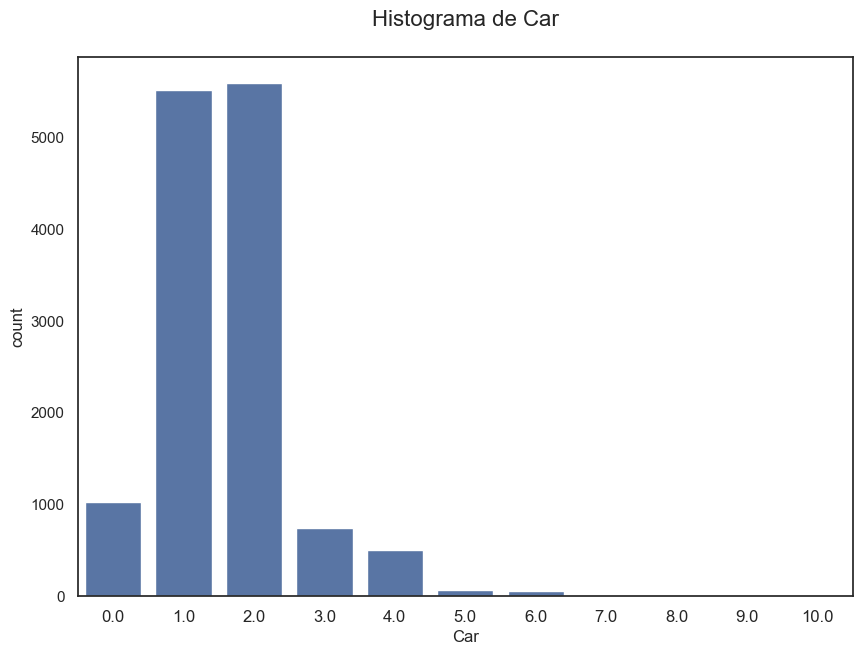

In [13]:
count_plotter(data.Car, "Car")

Também podemos encontrar o mesmo resultado com o método `value_counts` que já conhecemos:

In [14]:
pd.value_counts(data.Car)

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

Vemos que os valores mais prováveis para a coluna Car são 1 e 2.

Iremos imputar os valores ausentes deste campo de duas maneiras diferentes:
* O primeiro, atribuímos 2 a todos os valores ausentes na coluna Car
* O segundo, atribuímos 45% dos valores ausentes ao valor 1 e 2 para os valores restantes

E para finalizar verificamos se o fizemos corretamente.

##### Atribuímos 2 a todos os valores ausentes na coluna Car
Contamos quantos valores iguais a 2 e quantos valores nulos existem em Car:

In [15]:
# cria a condição para verificar se cada valor é igual a 2
data_car_2_mask = data.Car == 2

# somamos a quantas vezes o valor 2 aparece nesta coluna
data_car_2_count = data_car_2_mask.sum()
print(data_car_2_count)
print("---")

# verifica e soma os dados nulos na coluna Car
data_car_null_mask = data.Car.isnull()
data_car_null_count = data_car_null_mask.sum()
print(data_car_null_count)

5591
---
62


E então preenchemos:

In [16]:
data_car_2_fill = data.Car.fillna(2)
# Inventamos uma nova coluna para não modificar os dados originais e 
# que nos servirá para o seguinte exercício sem reler os dados novamente:
data["Car_fill"] = data_car_2_fill

Voltemos a contar:

In [17]:
data_car_2_mask = data.Car_fill == 2
data_car_2_count = data_car_2_mask.sum()
print(data_car_2_count)
print("---")
data_car_null_mask = data.Car_fill.isnull()
data_car_null_count = data_car_null_mask.sum()
print(data_car_null_count)

5653
---
0


Deve haver 5591 + 62 = 5653, fizemos certo !! :)

##### Atribuímos 45% dos valores ausentes ao valor 1 e 2 para os valores restantes

Antes de começar, vamos contar quantos registros temos com um valor de carro que seja:

* null
* 1
* 2

In [18]:
# conta a quantidade de dados nulos
cant_car_null = data.Car.isnull().sum()
print(cant_car_null)

# conta a quantidade de valores iguais a 1
car_one_mask = data.Car == 1
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

# conta a quantidade de valores iguais a 2
car_two_mask = data.Car == 2
cant_car_2 = car_two_mask.sum()
print(cant_car_2)


62
5509
5591


In [19]:
# registros que são nulos em Car:
data_car_null_mask = data.Car.isnull()
data_car_null = data.loc[data_car_null_mask, :]
print(data_car_null.shape[0])

# uma amostra de 45% dos registros calculados na etapa anterior:
data_car_null_mask_sample_1 = data_car_null.sample(frac = 0.45)

# pega os incies da amostra anterior
data_car_null_ones_index = data_car_null_mask_sample_1.index
print(len(data_car_null_ones_index))

# os que serão preenchidos com o valor 2 são todos aqueles que não foram selecionados na etapa anterior:
data_car_null_twos_index = data_car_null.index.difference(data_car_null_ones_index)
print(len(data_car_null_twos_index))


62
28
34


Agora que temos os índices que nos atendem, atribuímos os valores correspondentes aos registros selecionados:

In [20]:
data.loc[data_car_null_ones_index, "Car"] = 1
data.loc[data_car_null_twos_index, "Car"] = 2

Inicialmente tínhamos:
* 62 valores nulos, dos quais 28 assumiram o valor 1 e 34 assumiram o valor 2;
* 5509 registros com valor 1;
* 5591 registros com valor 2

Devemos agora ter:
* 0 valores nulos;
* 5509 + 28 = 5537 registros com valor 1;
* 5591 + 34 = 5625 registros com valor 2

Vamos contar novamente quantos valores ausentes temos agora, de modo a verificar se fizemos as coisas certas:

In [21]:
cant_car_null = data.Car.isnull().sum()
print(cant_car_null)

car_one_mask = data.Car == 1
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = data.Car == 2
cant_car_2 = car_two_mask.sum()
print(cant_car_2)


0
5537
5625


E estão de acordo com os valores esperados.

#### BuildingArea

Vemos que este campo tem uma alta proporção de dados nulos (6450/13580 que é de aproximadamente 48%).

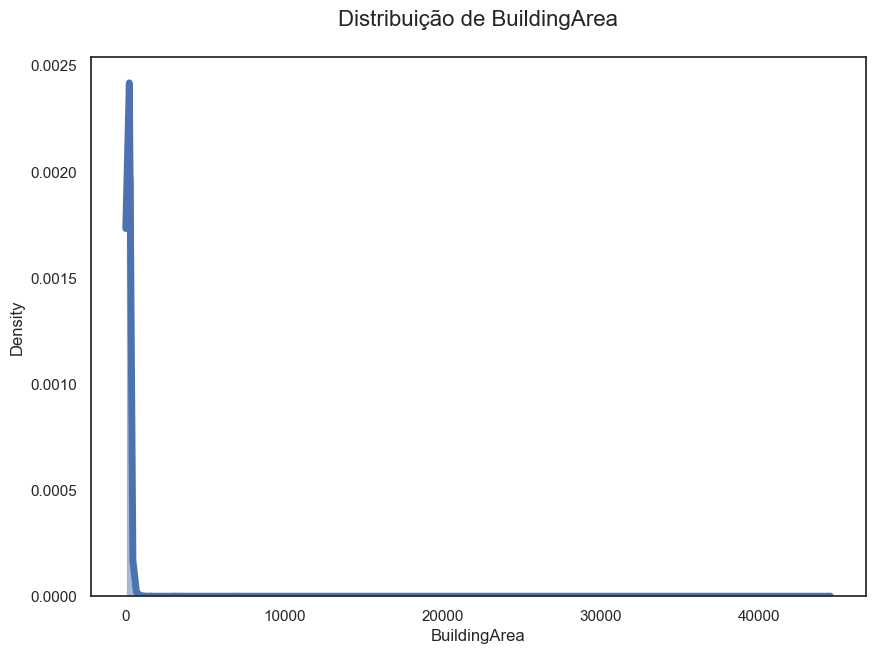

In [22]:
#distribution_plotter_warn(data.BuildingArea, "BuildingArea")
distribution_plotter(data.BuildingArea, 
                     "BuildingArea", 
                     bin_width = 500
                    )

Vemos que há muitos outliers, mas qual a forma da distribuição se ficarmos apenas com valores menores que 1000?

Para verificar isto usemos indexação booleana:

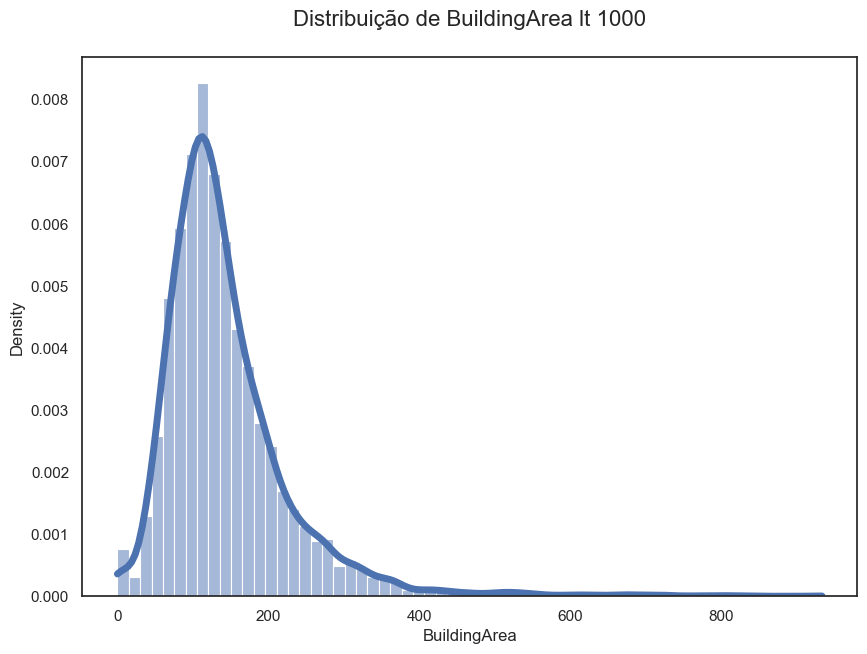

In [23]:
data_building_area_lt_1000_mask = data.BuildingArea < 1000
data_building_area_lt_1000 = data.loc[data_building_area_lt_1000_mask, : ]

#distribution_plotter_warn(data_building_area_lt_1000.BuildingArea, "BuildingArea lt 1000")
distribution_plotter(data_building_area_lt_1000.BuildingArea, "BuildingArea lt 1000", 
                     bin_width = 15)

In [24]:
# vamos verificar alguma estatísticas descritivas da seleção booleana que fizemos
# imprime a média da coluna
print(data_building_area_lt_1000.BuildingArea.mean())
# mostra a quantidade de linhas e colunas
print(data_building_area_lt_1000.shape)
# imprime a mediana
print(data_building_area_lt_1000.BuildingArea.median())
# imprime o desvio padrão
print(data_building_area_lt_1000.BuildingArea.std())
print("----")
# agora para a coluna como um todo, vamos checar as mesmas medidas estatísticas
# média
print(data.BuildingArea.mean())
# quantidade de linhas e colunas
print(data.shape)
# mediana
print(data.BuildingArea.median())
# desvio padrão
print(data.BuildingArea.std())

143.32860765234483
(7122, 22)
126.0
83.01166687168542
----
151.96764988779805
(13580, 22)
126.0
541.0145376263513


In [25]:
(data.BuildingArea.isnull().sum() / data.shape[0]) * 100

47.49631811487481

Podemos pensar em imputar os valores ausentes com o valor da média ou mediana do conjunto de dados completo ou do conjunto de dados reduzido que usamos no último gráfico, mas a proporção de dados nulos é muito alta nesse campo e intervalo de variação dos valores é muito amplo para considerar essa possibilidade como algo útil. Portanto, vamos remover essa coluna.

Antes de passar para a próxima coluna, vamos ver como os valores que calculamos acima mudariam se imputássemos os valores ausentes desse campo com a média:

In [26]:
media = data.BuildingArea.mean()

data_fill = data.BuildingArea.fillna(media)

#piso los datos originales:
data.BuildingArea = data_fill

print(data.BuildingArea.mean())
print(data.shape)
print(data.BuildingArea.median())
print(data.BuildingArea.std())

151.96764988779805
(13580, 22)
151.96764988779805
392.0029618346696


E a gente vê então que modificamos muito a dispersão desses dados, de forma que não representa a natureza inicial desses dados.

#### YearBuilt

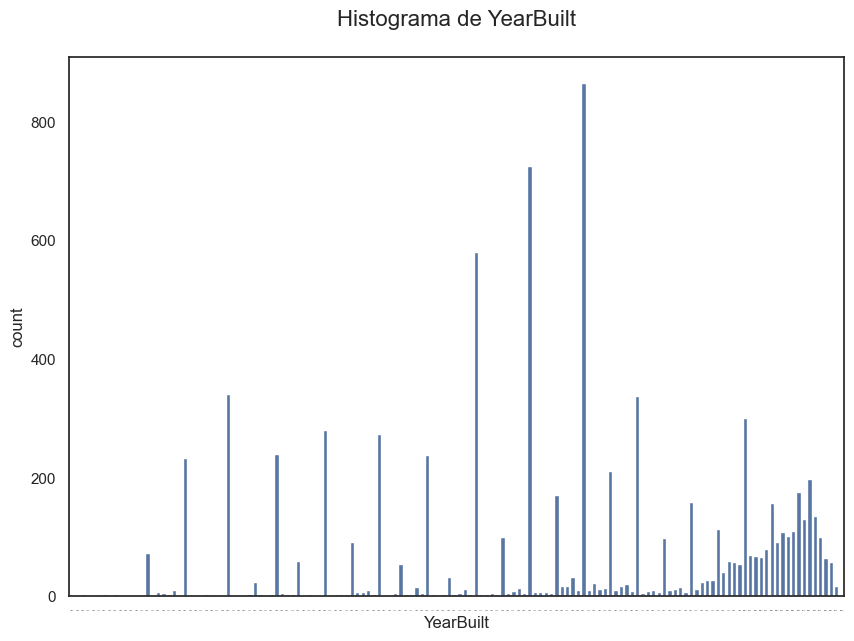

In [27]:
count_plotter(data.YearBuilt, "YearBuilt", 0)

Este caso é muito parecido com o anterior, um alto percentual de nulos e muita dispersão nos valores, portanto não vamos preencher os dados faltantes nessa coluna.

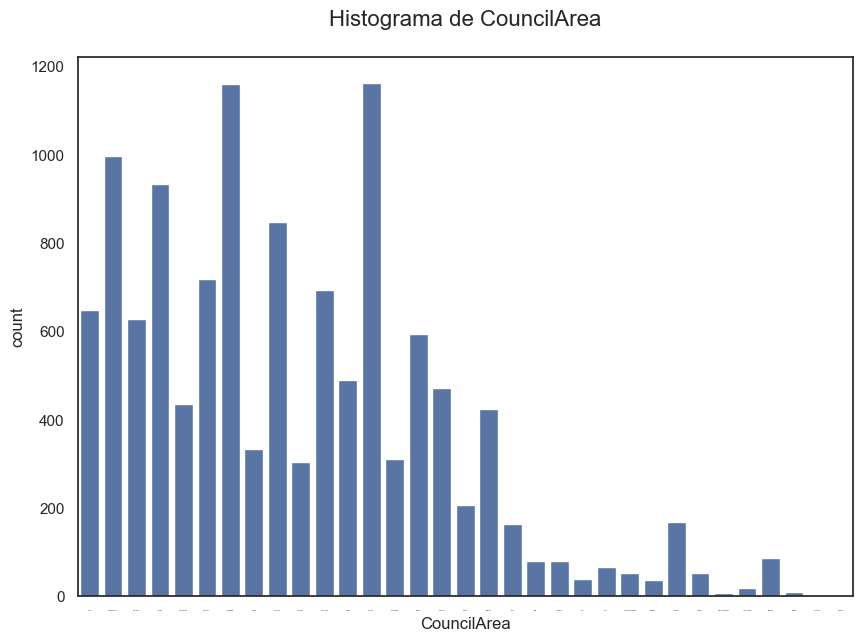

In [28]:
count_plotter(data.CouncilArea, "CouncilArea", 0)

In [29]:
pd.value_counts(data.CouncilArea)

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

O que a coluna `['CouncilArea']` lhe diz?